In [43]:
import os
import random
import xarray as xr
import metpy
import cartopy.crs as ccrs
from pyresample import geometry, grid
import numpy as np
import matplotlib.pyplot as plt
import datetime
import s3fs
fs = s3fs.S3FileSystem(anon = True)

random.seed(42)

In [44]:
pc = ccrs.PlateCarree()
pc_extents = [-124.25, -114.25, 32.25, 42.25]
pc_params = pc.proj4_params
target_extents = [pc_extents[0],
                    pc_extents[2],
                    pc_extents[1],
                    pc_extents[3]]
target_rows = 500
target_cols = 500
shape = [target_rows, target_cols]

In [46]:
# file = 'OR_ABI-L2-ACMC-M3_G17_s20183171802219_e20183171804592_c20183171805179.nc'
# data = xr.open_dataset('../../GOES_Files/nc_files/' + file)
# dat = data.metpy.parse_cf('BCM')
# geos = dat.metpy.cartopy_crs
# bcm = dat.data

# goes_params = geos.proj4_params
# source_area = geometry.AreaDefinition.from_cf(data)
# target_area = geometry.AreaDefinition.from_extent('CA', pc_params, shape, target_extents)

# result = grid.get_resampled_image(target_area, source_area, bcm)
# np.save('../../GOES_Files/clear_sky_mask/' + file[:-3], result)
# data.close()

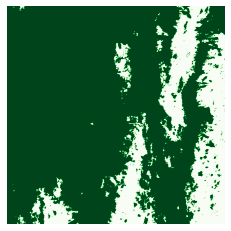

In [47]:
file = '../../GOES_Files/clear_sky_mask/OR_ABI-L2-ACMC-M3_G17_s20183171802219_e20183171804592_c20183171805179.npy'
mask = np.load(file)
plt.imshow(mask, aspect='equal', cmap='Greens')
plt.axis('off')
plt.show()

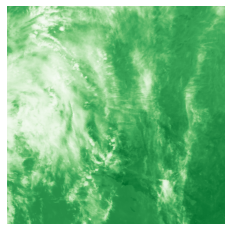

In [48]:
file = '../../GOES_Files/test_files/OR_ABI-L1b-RadC-M3C14_G17_s20183171802219_e20183171804592_c20183171805038.npy'
img_array = np.load(file)
plt.imshow(img_array, aspect='equal', cmap='Greens')
plt.axis('off')
plt.show()

In [49]:
mask = mask.astype(bool) #false means no clouds
img_array[mask]=0

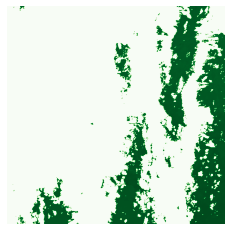

In [50]:
plt.imshow(img_array, aspect='equal', cmap='Greens')
plt.axis('off')
plt.show()